Data Source:https://www.usac.org/about/affordable-connectivity-program/acp-enrollment-and-claims-tracker/#enrollment-by-state

Data Dictionary:https://www.usac.org/wp-content/uploads/about/documents/acp/Data-Dictionary.pdf

ACP Tracker: https://docs.google.com/spreadsheets/d/10TXgJuorSMcl_v-OcbqgpkpsSia4SL_ErDXCML3iUbo/edit#gid=0



In [3]:
import pandas as pd
from matplotlib import pyplot as plt
#import pylab
import numpy as np
from scipy import stats
from datetime import date, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
def linear_plot(x,y,col_1,col_2):
    """Plot x,y including a linear regression
    
    Arguments:
    x = x-axis variable
    y = y-axis variable
    col_1: x-axis label
    col_2: y-axis label 
    """
    
    d=0.1
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    print('m = {} \ny0 = {} \nr = {}\nstd = {} '.format(slope, intercept, r, p, std_err))
    y_prep=list(map(lambda x0:(slope*x0+intercept),x))
    fig, ax= plt.subplots()
    fig.set_size_inches(8,4)
    ax.plot(x,y,color='orange')
    ax.plot(x,y_prep,color='green')
    ax.set_xlabel(col_1)
    ax.set_ylabel(col_2)
    ax.set_ylim(y.min()*(1-d),y.max()*(1+d))
    plt.show()
    
    return intercept,slope

In [5]:
ls *xlsx

ACP-Claims-by-County-January-November-2022.xlsx
ACP-Claims-by-County-January-October-2022.xlsx
ACP-Enrollments-by-County-as-of-December-1-2022.xlsx
ACP-Households-by-County-January-November-2022.xlsx
ACP-Households-by-County-January-October-2022.xlsx


# Claims vs Enrollments


**Claims:** Providers begin certifying claims on the 1st of the month for the prior data month (i.e. for example, on May 1 providers can begin to certify claims for the April 2022 data month). To be reimbursed within the current month, providers must certify the claims by the 15th of that month.

**Enrollment:** ACP providers must fully pass through ACP support to eligible households each month in the form of a discount regardless of when they file a claim for reimbursement. Each month, we will update the data to reflect claims certified during the six month window.

Enrollments are already receiving the benefit from providers. We use enrollments to count the total subscribers that will eventually be claimed by providers



## Claims

In [7]:
infile_c='ACP-Claims-by-County-January-November-2022.xlsx'
df_c=pd.read_excel(infile_c)

df_c=df_c[['data_month','total_claimed_subscribers', 'total_claimed_devices','service_support', 'device_support', 'total_support']]
df_c=df_c.groupby('data_month').sum()
df_c.reset_index(inplace=True)
df_c

,data_month,total_claimed_subscribers,total_claimed_devices,service_support,device_support,total_support
0,2022-01-01,8235728,413562,3.542841e+08,41335415.63,3.956195e+08
1,2022-02-01,8714543,278109,3.597353e+08,27796265.05,3.875316e+08
2,2022-03-01,9462909,223345,2.791492e+08,22238593.71,3.013877e+08
3,2022-04-01,9814091,184228,2.902180e+08,18326126.23,3.085441e+08
4,2022-05-01,10492334,217322,3.105463e+08,21665562.67,3.322118e+08
5,2022-06-01,11163104,236033,3.311573e+08,23507522.27,3.546648e+08
6,2022-07-01,11552438,246371,3.437182e+08,24564871.79,3.682830e+08
7,2022-08-01,12119733,320349,3.609515e+08,31946118.27,3.928976e+08
8,2022-09-01,10662298,306751,3.177272e+08,30615462.14,3.483427e+08
9,2022-10-01,11244496,316278,3.353980e+08,31576549.62,3.669746e+08


## Enrollments

In [9]:
infile_e='ACP-Households-by-County-January-November-2022.xlsx'
df_e=pd.read_excel(infile_e)
df_e.head()

,Data Month,State,State Name,County Name,State FIPS,County FIPS,Net New Enrollments Alternative Verification Process,Net New Enrollments Verified by School,Net New Enrollments Lifeline,Net New Enrollments National Verifier Application,Net New Enrollments total,Total Alternative Verification Process,Total Verified by School,Total Lifeline,Total National Verifier Application,Total Subscribers
0,2022-01-01,AL,ALABAMA,AUTAUGA COUNTY,1,001,46.0,-1.0,20.0,53.0,118.0,618.0,2.0,440.0,874.0,1934.0
1,2022-01-01,AL,ALABAMA,BALDWIN COUNTY,1,003,-13.0,0.0,78.0,114.0,179.0,521.0,5.0,959.0,1281.0,2766.0
2,2022-01-01,AL,ALABAMA,BARBOUR COUNTY,1,005,41.0,0.0,56.0,25.0,122.0,881.0,1.0,444.0,417.0,1743.0
3,2022-01-01,AL,ALABAMA,BIBB COUNTY,1,007,0.0,0.0,14.0,23.0,37.0,9.0,5.0,182.0,304.0,500.0
4,2022-01-01,AL,ALABAMA,BLOUNT COUNTY,1,009,12.0,-1.0,18.0,46.0,75.0,196.0,11.0,293.0,573.0,1073.0


In [10]:
infile_e='ACP-Households-by-County-January-November-2022.xlsx'
df_e=pd.read_excel(infile_e)
df_e=df_e[['Data Month','Net New Enrollments Alternative Verification Process',
       'Net New Enrollments Verified by School',
       'Net New Enrollments Lifeline',
       'Net New Enrollments National Verifier Application',
       'Net New Enrollments total', 'Total Alternative Verification Process',
       'Total Verified by School', 'Total Lifeline',
       'Total National Verifier Application', 'Total Subscribers']]
df_e=df_e.groupby('Data Month').sum().reset_index()
df_e

,Data Month,Net New Enrollments Alternative Verification Process,Net New Enrollments Verified by School,Net New Enrollments Lifeline,Net New Enrollments National Verifier Application,Net New Enrollments total,Total Alternative Verification Process,Total Verified by School,Total Lifeline,Total National Verifier Application,Total Subscribers
0,2022-01-01,177587.0,166.0,175850.0,297434.0,651037.0,2162716.0,7181.0,4592772.0,2934588.0,9697257.0
1,2022-02-01,190787.0,86.0,208375.0,168040.0,567288.0,2353503.0,7267.0,4801147.0,3102628.0,10264545.0
2,2022-03-01,197865.0,-9.0,327074.0,367012.0,891942.0,2551368.0,7258.0,5128221.0,3469640.0,11156487.0
3,2022-04-01,144234.0,-56.0,-33729.0,309115.0,419564.0,2695602.0,7202.0,5094492.0,3778755.0,11576051.0
4,2022-05-01,192531.0,64.0,57936.0,327978.0,578509.0,2888133.0,7266.0,5152428.0,4106733.0,12154560.0
5,2022-06-01,200525.0,-10.0,-7651.0,354273.0,547137.0,3088659.0,7256.0,5144776.0,4461003.0,12701694.0
6,2022-07-01,238668.0,-915.0,-152898.0,318686.0,403541.0,3327327.0,6341.0,4991878.0,4779689.0,13105235.0
7,2022-08-01,197208.0,-32.0,-146921.0,359346.0,409601.0,3524535.0,6309.0,4844957.0,5139035.0,13514836.0
8,2022-09-01,193807.0,-113.0,58644.0,337160.0,589498.0,3718342.0,6196.0,4903601.0,5476195.0,14104334.0
9,2022-10-01,147295.0,-68.0,100204.0,341311.0,588742.0,3865637.0,6128.0,5003805.0,5817506.0,14693076.0


## Claim ~ Enrollment

Before 2022-08-01 there is linear dependence between enrollments and claims with a gap of $\approx$ $1.74\times 10^6$


m = 0.448950370963078 
y0 = 4626741.615726177 
r = 0.643846319651531
std = 0.032534177161694856 


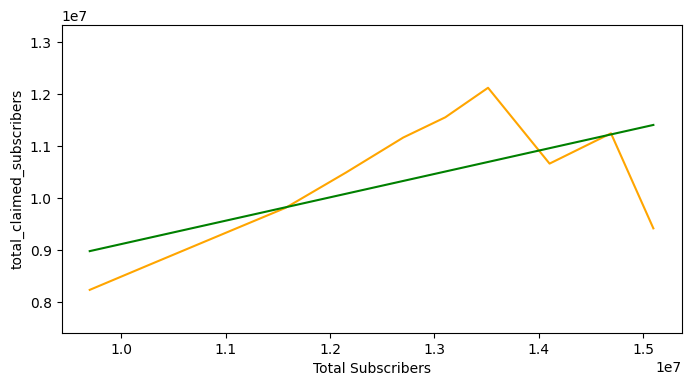

(4626741.615726177, 0.448950370963078)

In [32]:
#x=np.array(range(1,df_e.shape[0]+1))
x=df_e['Total Subscribers']
y=df_c['total_claimed_subscribers']
col_1='Total Subscribers'
col_2='total_claimed_subscribers'
#x=x[0:8]
#y=y[0:8]
linear_plot(x,y,col_1,col_2)

m = 1.0140498434025285 
y0 = -1742358.5120452456 
r = 0.9961632062320463
std = 1.407974577110122e-07 


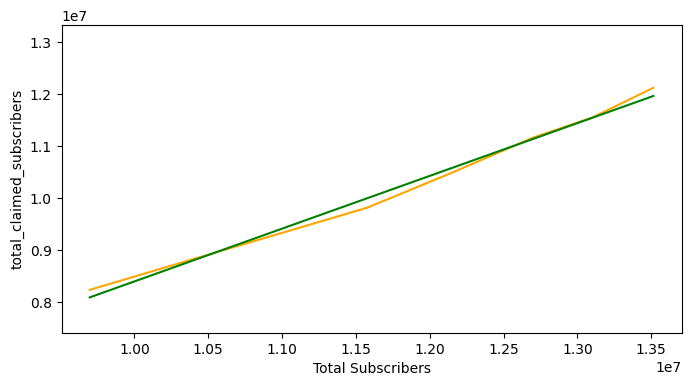

(-1742358.5120452456, 1.0140498434025285)

In [12]:
#x=np.array(range(1,df_e.shape[0]+1))
x=df_e['Total Subscribers']
y=df_c['total_claimed_subscribers']
col_1='Total Subscribers'
col_2='total_claimed_subscribers'
x=x[0:8]
y=y[0:8]
linear_plot(x,y,col_1,col_2)

# Total Support

For claims made after 2022-03-01, there is a flat relationship between total_claimed_subscribers and total_support. We use the mean of the ratio between this two quantities as a proxy for the amount of benefit per suscriber and later per enrollment

\begin{equation}
x= \frac{\rm{total\_claimed\_support}}{\rm{total\_claimed\_subscribers}} 
\end{equation}

\begin{equation}
\bar{x}\sim \$34.72
\end{equation}

This approximation takes into account the device one time support of \$100 for devices

m = -1.0472420712654509 
y0 = 41.04425174339634 
r = -0.6021302444574265
std = 0.049970400247901094 


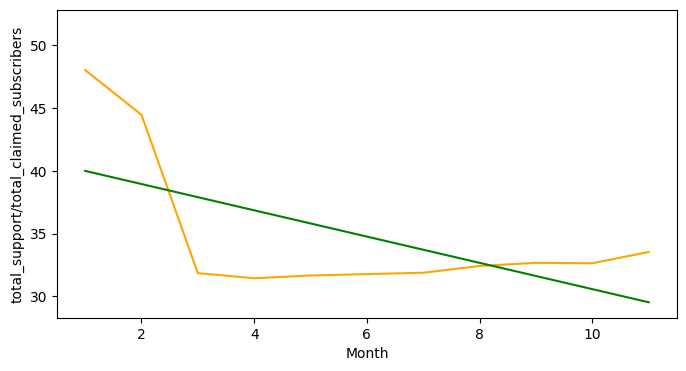

(41.04425174339634, -1.0472420712654509)

In [13]:
x=np.array(range(1,df_e.shape[0]+1))
y=df_c['total_support']/df_c['total_claimed_subscribers']
col_1='Month'
col_2='total_support/total_claimed_subscribers'
linear_plot(x,y,col_1,col_2)

m = 0.1656618567949997 
y0 = 30.9616761830557 
r = 0.8249897131023135
std = 0.022342477806664485 


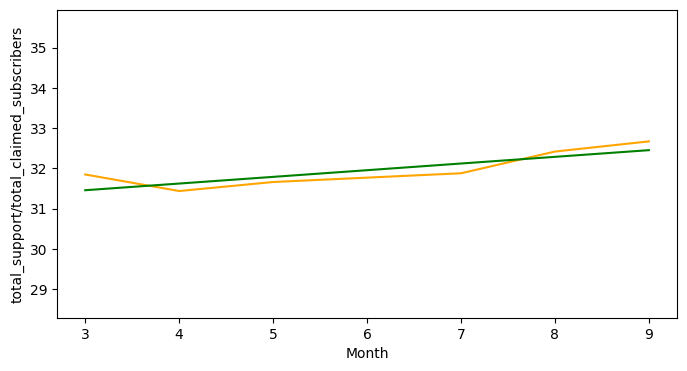

(30.9616761830557, 0.1656618567949997)

In [14]:
#=np.array(range(1,df_e.shape[0]+1))

x=np.array(range(1,df_e.shape[0]+1))
y=df_c['total_support']/df_c['total_claimed_subscribers']
col_1='Month'
col_2='total_support/total_claimed_subscribers'
x=x[2:9]
y=y[2:9]
label='x'
linear_plot(x,y,col_1,col_2)

In [15]:
monthly_ben=y.mean()
monthly_ben

31.955647323825698

# Enrollment Rate

New enrollments/month: there is not "strong" correlation with time

Theh new monthly enrollments is approximated by the mean of pass values: `df_e['Net New Enrollments total'].mean() = 550271.36`

Note: Time series analysis for weekly enrollments does not show any trends. The Peak of enrollments in March representd in the followin plot can also be seen in the weekly enrollment data.

m = -20372.409090909096 
y0 = 672505.8181818182 
r = -0.4660521347444675
std = 0.14850250644644097 


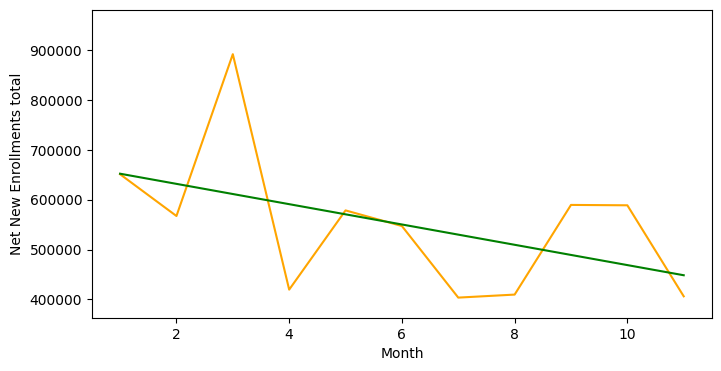

In [35]:
x=np.array(range(1,df_e.shape[0]+1))
y=df_e['Net New Enrollments total']
col_1='Month'
col_2='Net New Enrollments total'
y0,m=linear_plot(x,y,col_1,col_2)


In [17]:
monthly_enroll=df_e['Net New Enrollments total'].mean()
monthly_enroll

550271.3636363636

# ACP Digital Cliff

Parameters
Total Eligible HH from ESH estimation: 52514583

In [26]:
total_elig=52514583
ebb_enrol=9046220.0
ebb_f=2.2e9
funds=14.2e9+ebb_f
print('Parameters:')
print('Monthly Enrollments Average= ', monthly_enroll)
print('Monthly Benefit per Enrollment= ',monthly_ben)
print('Total Funds= ',funds)
print('Total Eligible HH = ',total_elig)

Parameters:
Monthly Enrollments Average=  550271.3636363636
Monthly Benefit per Enrollment=  31.955647323825698
Total Funds=  16400000000.0
Total Eligible HH =  52514583


## The model with constant monthly new enrollments 

In [28]:
df_p=pd.DataFrame()
df_p['Data Month']=df_e['Data Month']
df_p['Net New Enrollments total']=df_e['Net New Enrollments total']
df_p.reset_index()

sdate = date(2022,12,1)   # start date
edate = date(2026,1,1)
months= pd.date_range(sdate,edate , freq='1M')-pd.offsets.MonthBegin(1)
new_enroll=months.shape[0]*[monthly_enroll]

df_a=pd.DataFrame()
df_a['Data Month']=months
df_a['Net New Enrollments total']=new_enroll

df_p=df_p.append(df_a).reset_index(drop=True)



df_p['Total Subscribers']=df_p['Net New Enrollments total'].cumsum()+ebb_enrol
df_p['Totat Support']=df_p['Total Subscribers']*monthly_ben
df_p['Totat Support cum']=df_p['Totat Support'].cumsum()
df_p['Total Support cum norm']=df_p['Totat Support cum']/funds*100
df_p['Enrollment Pct']=df_p['Total Subscribers']/total_elig*100

outfile='acp_digital_cliff_mean.csv'
df_p.to_csv(outfile,index=False)

df_p.info()
df_p.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Data Month                 48 non-null     datetime64[ns]
 1   Net New Enrollments total  48 non-null     float64       
 2   Total Subscribers          48 non-null     float64       
 3   Totat Support              48 non-null     float64       
 4   Totat Support cum          48 non-null     float64       
 5   Total Support cum norm     48 non-null     float64       
 6   Enrollment Pct             48 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.8 KB


/var/folders/rh/4xd1337512l1025llqtt0d2h0000gn/T/ipykernel_1817/2912271035.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Data Month,Net New Enrollments total,Total Subscribers,Totat Support,Totat Support cum,Total Support cum norm,Enrollment Pct
0,2022-01-01,651037.000000,9.697257e+06,3.098821e+08,3.098821e+08,1.889525,18.465836
1,2022-02-01,567288.000000,1.026454e+07,3.280102e+08,6.378923e+08,3.889587,19.546085
2,2022-03-01,891942.000000,1.115649e+07,3.565128e+08,9.944051e+08,6.063446,21.244550
3,2022-04-01,419564.000000,1.157605e+07,3.699202e+08,1.364325e+09,8.319057,22.043498
4,2022-05-01,578509.000000,1.215456e+07,3.884068e+08,1.752732e+09,10.687391,23.145114
5,2022-06-01,547137.000000,1.270170e+07,4.058909e+08,2.158623e+09,13.162336,24.186990
6,2022-07-01,403541.000000,1.310524e+07,4.187864e+08,2.577409e+09,15.715911,24.955426
7,2022-08-01,409601.000000,1.351484e+07,4.318754e+08,3.009285e+09,18.349298,25.735402
8,2022-09-01,589498.000000,1.410434e+07,4.507132e+08,3.459998e+09,21.097549,26.857943
9,2022-10-01,588742.000000,1.469308e+07,4.695269e+08,3.929525e+09,23.960518,27.979045


### Results

In [29]:

ro=df_p[df_p['Total Support cum norm']<=100]
p=df_p.iloc[ro.shape[0]-1]
p

Data Month                   2024-05-01 00:00:00
Net New Enrollments total          550271.363636
Total Subscribers                25004089.545455
Totat Support                   799021867.167902
Totat Support cum             16104028917.795916
Total Support cum norm                 98.195298
Enrollment Pct                         47.613612
Name: 28, dtype: object

In [30]:
primary="% Total Funds"
secondary="% Enrollment"

fig = make_subplots(specs=[[{"secondary_y": True}]])
col_1='Total Support cum norm'
fig.add_trace(
    go.Scatter(x=df_p['Data Month'],y=df_p[col_1],name=primary),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=[p[0],p[0]],y=[0,200],name="Date for Funds Running Out"),
    secondary_y=False,
)
col_2='Enrollment Pct'
fig.add_trace(
    go.Scatter(x=df_p['Data Month'],y=df_p[col_2], name=secondary),
    secondary_y=True,
)
fig.update_layout(xaxis_range=['2022-01-01','2025-01-01'],yaxis_range=[0,120],title_text="ACP Digital Cliff")

fig.update_yaxes(
        title_text=primary, 
        secondary_y=False)
fig.update_yaxes(
        title_text=secondary, 
        secondary_y=True)


## The model with monthly new enrollments as linear extrapolation

... of the current data as of November 2022 




In [36]:
df_p=pd.DataFrame()
df_p['Data Month']=df_e['Data Month']
df_p['Net New Enrollments total']=df_e['Net New Enrollments total']
df_p.reset_index()

sdate = date(2022,12,1)   # start date
edate = date(2026,1,1)
months= pd.date_range(sdate,edate , freq='1M')-pd.offsets.MonthBegin(1)

#new_enroll=months.shape[0]*[monthly_enroll]
new_enroll=y0+m*np.array(list(range(0,months.shape[0])))

df_a=pd.DataFrame()
df_a['Data Month']=months
df_a['Net New Enrollments total']=new_enroll

df_p=df_p.append(df_a).reset_index(drop=True)



df_p['Total Subscribers']=df_p['Net New Enrollments total'].cumsum()+ebb_enrol
df_p['Totat Support']=df_p['Total Subscribers']*monthly_ben
df_p['Totat Support cum']=df_p['Totat Support'].cumsum()
df_p['Total Support cum norm']=df_p['Totat Support cum']/funds*100
df_p['Enrollment Pct']=df_p['Total Subscribers']/total_elig*100

outfile='acp_digital_cliff_linear.csv'
df_p.to_csv(outfile,index=False)

df_p.info()
df_p.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Data Month                 48 non-null     datetime64[ns]
 1   Net New Enrollments total  48 non-null     float64       
 2   Total Subscribers          48 non-null     float64       
 3   Totat Support              48 non-null     float64       
 4   Totat Support cum          48 non-null     float64       
 5   Total Support cum norm     48 non-null     float64       
 6   Enrollment Pct             48 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.8 KB


/var/folders/rh/4xd1337512l1025llqtt0d2h0000gn/T/ipykernel_1817/1274825866.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Data Month,Net New Enrollments total,Total Subscribers,Totat Support,Totat Support cum,Total Support cum norm,Enrollment Pct
0,2022-01-01,651037.000000,9.697257e+06,3.098821e+08,3.098821e+08,1.889525,18.465836
1,2022-02-01,567288.000000,1.026454e+07,3.280102e+08,6.378923e+08,3.889587,19.546085
2,2022-03-01,891942.000000,1.115649e+07,3.565128e+08,9.944051e+08,6.063446,21.244550
3,2022-04-01,419564.000000,1.157605e+07,3.699202e+08,1.364325e+09,8.319057,22.043498
4,2022-05-01,578509.000000,1.215456e+07,3.884068e+08,1.752732e+09,10.687391,23.145114
5,2022-06-01,547137.000000,1.270170e+07,4.058909e+08,2.158623e+09,13.162336,24.186990
6,2022-07-01,403541.000000,1.310524e+07,4.187864e+08,2.577409e+09,15.715911,24.955426
7,2022-08-01,409601.000000,1.351484e+07,4.318754e+08,3.009285e+09,18.349298,25.735402
8,2022-09-01,589498.000000,1.410434e+07,4.507132e+08,3.459998e+09,21.097549,26.857943
9,2022-10-01,588742.000000,1.469308e+07,4.695269e+08,3.929525e+09,23.960518,27.979045


### Results

In [37]:
ro=df_p[df_p['Total Support cum norm']<=100]
p=df_p.iloc[ro.shape[0]-1]
p

Data Month                   2024-05-01 00:00:00
Net New Enrollments total          326174.863636
Total Subscribers                24087331.136364
Totat Support                   769726258.765842
Totat Support cum             16141136688.438528
Total Support cum norm                 98.421565
Enrollment Pct                          45.86789
Name: 28, dtype: object

In [38]:
primary="% Total Funds"
secondary="% Enrollment"

fig = make_subplots(specs=[[{"secondary_y": True}]])
col_1='Total Support cum norm'
fig.add_trace(
    go.Scatter(x=df_p['Data Month'],y=df_p[col_1],name=primary),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=[p[0],p[0]],y=[0,200],name="Date for Funds Running Out"),
    secondary_y=False,
)
col_2='Enrollment Pct'
fig.add_trace(
    go.Scatter(x=df_p['Data Month'],y=df_p[col_2], name=secondary),
    secondary_y=True,
)
fig.update_layout(xaxis_range=['2022-01-01','2025-01-01'],yaxis_range=[0,120],title_text="ACP Digital Cliff")

fig.update_yaxes(
        title_text=primary, 
        secondary_y=False)
fig.update_yaxes(
        title_text=secondary, 
        secondary_y=True)


### The with the linear growht of monthly new enrollments as a parameter

As an ilustration, the following model assumes a linear growth for the monthly new enrollments
with:

- y-intercept: average of monthly new enrollments as of November 2022
- slope: a positive growth from the previous linear extrapolation described in the past section

In [40]:
df_p=pd.DataFrame()
df_p['Data Month']=df_e['Data Month']
df_p['Net New Enrollments total']=df_e['Net New Enrollments total']
df_p.reset_index()

sdate = date(2022,12,1)   # start date
edate = date(2026,1,1)
months= pd.date_range(sdate,edate , freq='1M')-pd.offsets.MonthBegin(1)

#new_enroll=months.shape[0]*[monthly_enroll]
y02=monthly_enroll
m2=-m

new_enroll=y02+m2*np.array(list(range(0,months.shape[0])))

df_a=pd.DataFrame()
df_a['Data Month']=months
df_a['Net New Enrollments total']=new_enroll

df_p=df_p.append(df_a).reset_index(drop=True)



df_p['Total Subscribers']=df_p['Net New Enrollments total'].cumsum()+ebb_enrol
df_p['Totat Support']=df_p['Total Subscribers']*monthly_ben
df_p['Totat Support cum']=df_p['Totat Support'].cumsum()
df_p['Total Support cum norm']=df_p['Totat Support cum']/funds*100
df_p['Enrollment Pct']=df_p['Total Subscribers']/total_elig*100

#outfile='acp_digital_cliff_linear.csv'
#df_p.to_csv(outfile,index=False)

df_p.info()
df_p.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Data Month                 48 non-null     datetime64[ns]
 1   Net New Enrollments total  48 non-null     float64       
 2   Total Subscribers          48 non-null     float64       
 3   Totat Support              48 non-null     float64       
 4   Totat Support cum          48 non-null     float64       
 5   Total Support cum norm     48 non-null     float64       
 6   Enrollment Pct             48 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.8 KB


/var/folders/rh/4xd1337512l1025llqtt0d2h0000gn/T/ipykernel_1817/1965109831.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Data Month,Net New Enrollments total,Total Subscribers,Totat Support,Totat Support cum,Total Support cum norm,Enrollment Pct
0,2022-01-01,651037.000000,9.697257e+06,3.098821e+08,3.098821e+08,1.889525,18.465836
1,2022-02-01,567288.000000,1.026454e+07,3.280102e+08,6.378923e+08,3.889587,19.546085
2,2022-03-01,891942.000000,1.115649e+07,3.565128e+08,9.944051e+08,6.063446,21.244550
3,2022-04-01,419564.000000,1.157605e+07,3.699202e+08,1.364325e+09,8.319057,22.043498
4,2022-05-01,578509.000000,1.215456e+07,3.884068e+08,1.752732e+09,10.687391,23.145114
5,2022-06-01,547137.000000,1.270170e+07,4.058909e+08,2.158623e+09,13.162336,24.186990
6,2022-07-01,403541.000000,1.310524e+07,4.187864e+08,2.577409e+09,15.715911,24.955426
7,2022-08-01,409601.000000,1.351484e+07,4.318754e+08,3.009285e+09,18.349298,25.735402
8,2022-09-01,589498.000000,1.410434e+07,4.507132e+08,3.459998e+09,21.097549,26.857943
9,2022-10-01,588742.000000,1.469308e+07,4.695269e+08,3.929525e+09,23.960518,27.979045


In [41]:
ro=df_p[df_p['Total Support cum norm']<=100]
p=df_p.iloc[ro.shape[0]-1]
p

Data Month                   2024-04-01 00:00:00
Net New Enrollments total          876229.909091
Total Subscribers                27224465.818182
Totat Support                   869975428.265366
Totat Support cum             15836234082.985376
Total Support cum norm                 96.562403
Enrollment Pct                         51.841725
Name: 27, dtype: object

In [42]:
primary="% Total Funds"
secondary="% Enrollment"

fig = make_subplots(specs=[[{"secondary_y": True}]])
col_1='Total Support cum norm'
fig.add_trace(
    go.Scatter(x=df_p['Data Month'],y=df_p[col_1],name=primary),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=[p[0],p[0]],y=[0,200],name="Date for Funds Running Out"),
    secondary_y=False,
)
col_2='Enrollment Pct'
fig.add_trace(
    go.Scatter(x=df_p['Data Month'],y=df_p[col_2], name=secondary),
    secondary_y=True,
)
fig.update_layout(xaxis_range=['2022-01-01','2025-01-01'],yaxis_range=[0,120],title_text="ACP Digital Cliff")

fig.update_yaxes(
        title_text=primary, 
        secondary_y=False)
fig.update_yaxes(
        title_text=secondary, 
        secondary_y=True)